# Author: Lucas Spitzer
# Date: 2/25/2024

In [3]:
# import cleaned data
import pandas as pd
import matplotlib.pyplot as plt

computing_majors = pd.read_csv('cleaned-data/computing_majors.csv')
computing_majors.head()

,Timestamp,Which course are you enrolled in?,Awareness - Website,Awareness - Social Media,Awareness - Community Event,Awareness - Family or Friend,Awareness - Current Student,Awareness - Alumni,Awareness - High School Teacher,Awareness - High School Counselor,...,Computing Info Sources - CCM Admissions,Computing Info Sources - CCM Advisor,Computing Info Sources - Employer,Computing Info Sources - CCM Workforce Development,Computing Info Sources - NJ Workforce Development Program,Computing Info Sources - Other,Computing Major Choice,Gender,Race/ethnicity,Age
0,2023/09/04 5:12:28 PM EST,CMP 239 Internet & Web Page Design,Yes,No,No,Yes,No,No,No,No,...,No,Yes,No,No,No,No,First Choice,Man,Black/African American,35-64
1,2023/09/04 5:15:24 PM EST,CMP 128 Computer Science I,Yes,Don't recall,No,Yes,No,No,Yes,Don't recall,...,Don't recall,Yes,Yes,No,Don't recall,No,Business,Woman,American Indian/Native American/Alaska Native;...,21-24
2,2023/09/04 9:19:18 PM EST,CMP 239 Internet & Web Page Design,Yes,Yes,No,Yes,No,No,No,Yes,...,Don't recall,No,Yes,No,No,Yes,First Choice,Woman,Hispanic or Latino,18 and younger
3,2023/09/04 10:55:07 PM EST,CMP 239 Internet & Web Page Design,Yes,No,No,Yes,No,No,No,No,...,No,No,No,No,No,No,First Choice,Non-binary,White/Caucasian,19-20
4,2023/09/05 8:53:07 AM EST,CMP 239 Internet & Web Page Design,Yes,No,Don't recall,Yes,Yes,No,Yes,Yes,...,No,No,No,No,No,No,First Choice,Woman,Hispanic or Latino,19-20


### Question #1
#### Compare the age demographics of the survey over time (2020-2023). What are the changes over time, if any?

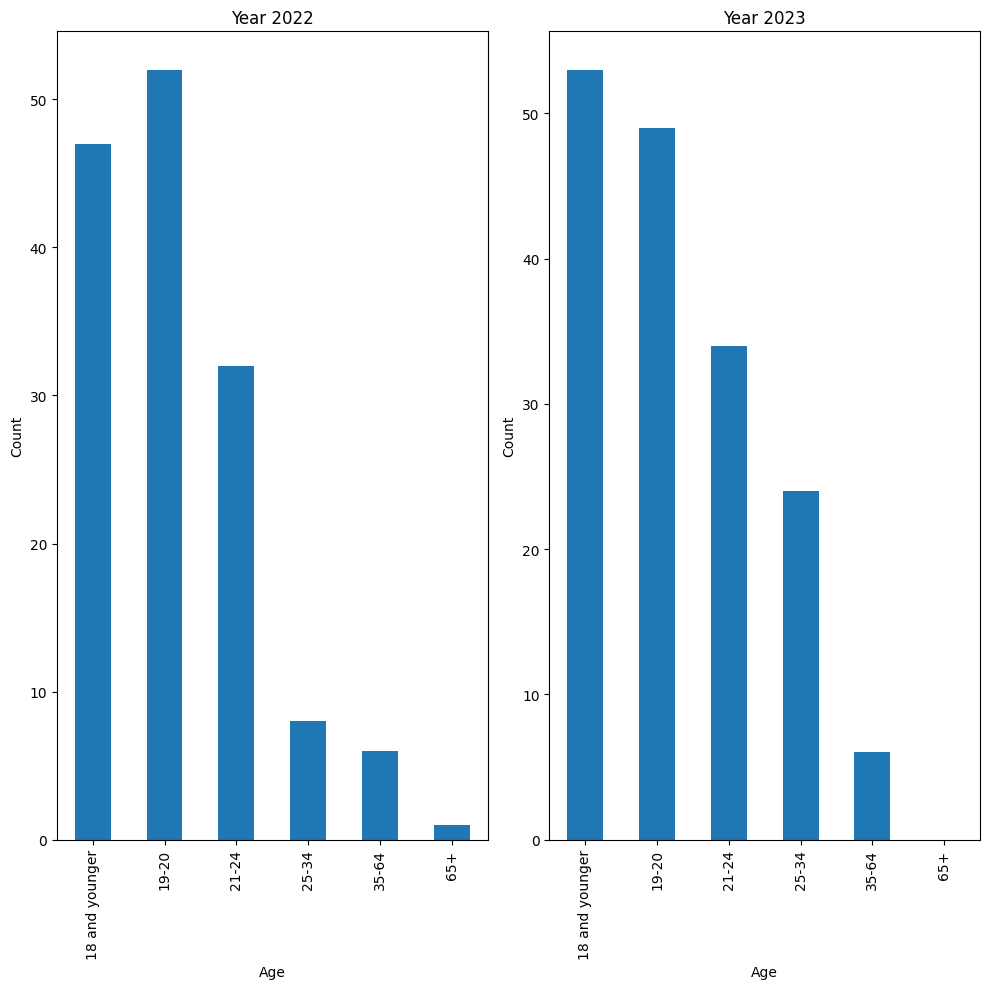

In [8]:
# Maintenace: Convert the Timestamp column to a datetime objects
computing_majors['Timestamp'] = pd.to_datetime(computing_majors['Timestamp'])

# Step 1: Extract the year from the Timestamp column
computing_majors['Year'] = computing_majors['Timestamp'].dt.year

# Step 2: Group the data by year and calculate the age distribution for each year
age_distribution = computing_majors.groupby(['Year', 'Age']).size().unstack(fill_value=0)

# Step 3: Create a figure with 4 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

# Step 4: Plot the bar charts on each subplot
years = [2022, 2023]
for i, year in enumerate(years):
    ax = axs.flatten()[i]
    age_distribution.loc[year].plot(kind='bar', ax=ax)
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Count')

# Step 5: Display the plots
plt.tight_layout()


##### The large difference from 2022 to 2023 was a substantial growth of students from ages 25-34

### Question #2
#### What is the interest level for taking another computing class? Show a bar chart.

### Question #3
#### How do most tech majors learn about CCM's computing programs?

In [26]:
# Step 1: Filtering dataframe to contain only the columns with the computing info sources
computing_info_sources_cols = computing_majors.filter(like='Computing Info Sources')

# Step 2: Counting the number of students who said yes to each source
info_source_counts = computing_info_sources_cols.apply(lambda col: (col == 'Yes').sum())

# Step 3: Calculating the percentage of students who said yes to each source
info_source_ratios = str(round((info_source_counts / len(computing_majors)) * 100, 2)) + '%'

# Step 4: Displaying the percentage of students who said yes to each source
print("Percent of students who said yes to each source:")
print(info_source_ratios)

Percent of students who said yes to each source:
Computing Info Sources - High School Guidance Counselor          26.28
Computing Info Sources - High School Teacher                     17.31
Computing Info Sources - CCM Information Technologies Website    41.03
Computing Info Sources - CCM Admissions                          32.69
Computing Info Sources - CCM Advisor                             30.77
Computing Info Sources - Employer                                 2.88
Computing Info Sources - CCM Workforce Development                2.88
Computing Info Sources - NJ Workforce Development Program         3.21
Computing Info Sources - Other                                   12.50
dtype: float64%


##### We can conclude most students learn about CCM's computing programs from CCM's inherent resources (Advising, Admissions, Website) and through local high school connections.

### Question #4
#### What motivates CCM computing students to earn tech degrees?

In [27]:
# Step 1: Filtering dataframe to contain only the columns with types of motivation
computing_motivation_cols = computing_majors.filter(like='Motivation')

# Step 2: Counting the number of students who said yes to each form of motivation
motivation_counts = computing_motivation_cols.apply(lambda col: (col == 'Yes').sum())

# Step 3: Calculating the percentage of students who said yes to each form of motivation
motivation_ratios = str(round((motivation_counts / len(computing_majors)) * 100, 2)) + '%'

# Step 4: Displaying the percentage of students who said yes to each form of motivation
print("Percent of students who said yes to form of motivation:")
print(motivation_ratios)

Percent of students who said yes to form of motivation:
Motivation - Job in Computing Field                  92.95
Motivation - Transfer to Bachelor's Level Program    75.96
Motivation - Transfer Credits Back to HS Degree      12.18
Motivation - Career Advancement                      61.22
Motivation - Career Change                           31.73
Motivation - Professional Development                62.18
Motivation - Job Displacement                        13.14
Motivation - Relocation                              15.38
Motivation - Keep Current in Tech Industry           52.88
Motivation - IT Industry Certifications              52.56
Motivation - Financial                               63.14
Motivation - Personal Enrichment                     66.35
dtype: float64%


##### Based on the analysis above, of the many reasons to earn a degree in computing, students are primarily incentivzed through personal growth (academic and/or financial).